## Sequential model to predict cat and dogs

****Importing necessary libraries****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

**Directories and sub-directories**

In [3]:
base_directory = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
training_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

In [4]:
training_directory_cats = os.path.join(training_directory, 'cats')
training_directory_dogs = os.path.join(training_directory, 'dogs')
validation_directory_cats = os.path.join(validation_directory, 'cats')
validation_directory_dogs = os.path.join(validation_directory, 'dogs')

In [5]:
number_cats_training = len(os.listdir(training_directory_cats))
number_dogs_training = len(os.listdir(training_directory_dogs))

number_cats_validation = len(os.listdir(validation_directory_cats))
number_dogs_validation = len(os.listdir(validation_directory_dogs))

total_training_images = number_cats_training + number_dogs_training
total_validation_images = number_cats_validation + number_dogs_validation

print('Total images of cat for training:', number_cats_training)
print('total images of dog for training:', number_dogs_training)

print('total images of cat for validation:', number_cats_validation)
print('total images of dog for validation:', number_dogs_validation)

print("Total training images(cats and dogs):", total_training_images)
print("Total validation images(cats and dogs):", total_validation_images)

Total images of cat for training: 1000
total images of dog for training: 1000
total images of cat for validation: 500
total images of dog for validation: 500
Total training images(cats and dogs): 2000
Total validation images(cats and dogs): 1000


In [6]:
BATCH_SIZE = 100
IMAGE_HEIGHT = 150
IMAGE_WIDTH = 150

In [7]:
training_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45)
validation_image_generator = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [8]:
training_data_generator = training_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=training_directory,
                                                           shuffle=True,
                                                           target_size=(IMAGE_HEIGHT,IMAGE_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [9]:
validation_data_generator = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_directory,
                                                              shuffle=False,
                                                              target_size=(IMAGE_HEIGHT,IMAGE_WIDTH), 
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
EPOCHS = 10
history = model.fit_generator(
    training_data_generator,
    steps_per_epoch=int(np.ceil(total_training_images / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=validation_data_generator,
    validation_steps=int(np.ceil(total_validation_images / float(BATCH_SIZE)))
)

C:\Users\subas\AppData\Local\Temp\ipykernel_34692\2118433487.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 105s 5s/step - loss: 0.7297 - accuracy: 0.5040 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 69s 3s/step - loss: 0.6919 - accuracy: 0.5050 - val_loss: 0.6872 - val_accuracy: 0.5290
Epoch 3/10
20/20 [==============================] - 70s 4s/step - loss: 0.6846 - accuracy: 0.5365 - val_loss: 0.6637 - val_accuracy: 0.5740
Epoch 4/10
20/20 [==============================] - 69s 3s/step - loss: 0.6692 - accuracy: 0.5960 - val_loss: 0.6739 - val_accuracy: 0.5340
Epoch 5/10
20/20 [==============================] - 67s 3s/step - loss: 0.6434 - accuracy: 0.6255 - val_loss: 0.6215 - val_accuracy: 0.6470
Epoch 6/10
20/20 [==============================] - 69s 3s/step - loss: 0.6195 - accuracy: 0.6500 - val_loss: 0.6296 - val_accuracy: 0.6480
Epoch 7/10
20/20 [==============================] - 68s 3s/step - loss: 0.6004 - accuracy: 0.6710 - val_loss: 0.5876 - val_accuracy: 0.6860
Epoch 8/10
20/20 [=

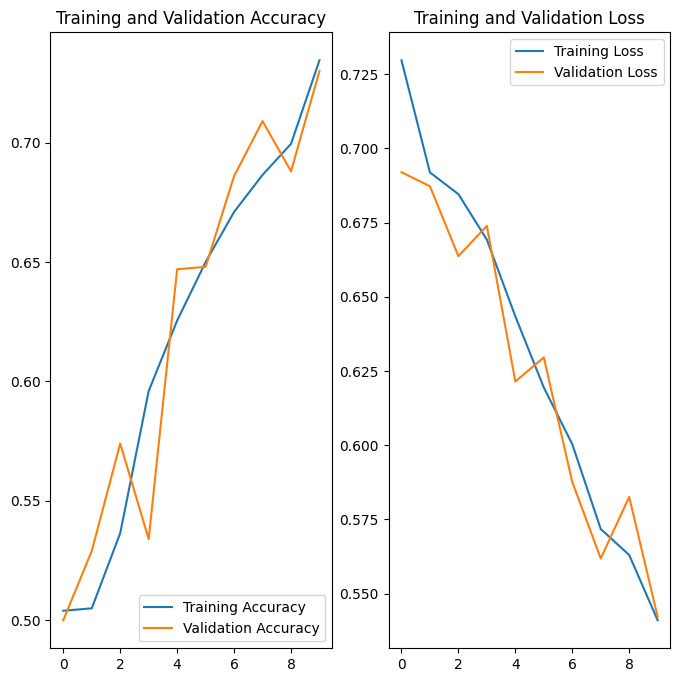

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [15]:
image = tf.keras.preprocessing.image.load_img('./Images/cat-image.jpg', target_size=(150,150,3))
input_arr = tf.keras.preprocessing.image.img_to_array(image)

img = np.ones((150, 150, 3))

new = np.tile(input_arr, 3)
input_arr = np.array([input_arr])
predictions = model.predict(input_arr)
print(np.argmax(predictions))

1/1 [==============================] - 0s 440ms/step
1


**Saving Model**

In [34]:
if not os.path.exists("./Models"):
    os.makedirs('/Models')
model.save('./Models/Sequential_cat_dog_detection.h5')